In [1]:
import jax.numpy as jnp
from diffrax import ODETerm, Dopri5, diffeqsolve, SaveAt
import matplotlib.pyplot as plt

In [2]:
# 1) Define the system dy/dt = f(t, y)
def f(t, y, args):
    k1, k2 = args
    y1, y2 = y
    dy1_dt = -k1 * y1 + k2 * y2
    dy2_dt = k1 * y1 - k2 * y2
    return jnp.stack([dy1_dt, dy2_dt])


# 2) Wrap in an ODETerm
term = ODETerm(f)

# 3) Choose solver
solver = Dopri5()

# 4) Solve from t=0 to t=5
k1, k2 = 0.5, 0.1
y0 = jnp.array([1.0, 0.0])  # initial concentrations
solution = diffeqsolve(
    term,
    solver,
    t0=0.0,
    t1=5.0,
    dt0=0.01,
    y0=y0,
    args=(k1, k2),
    saveat=SaveAt(ts=jnp.linspace(0, 5, 200)),
)

# 5) Grab time-series
ts = solution.ts  # shape (200,)
ys = solution.ys  # shape (200, 2)

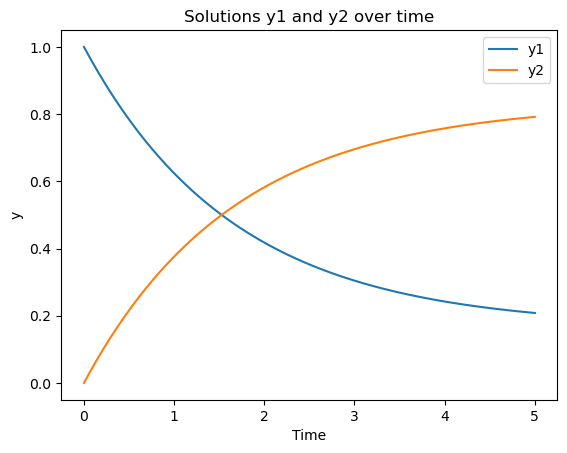

In [3]:
plt.figure()
plt.plot(ts, ys[:, 0], label="y1")
plt.plot(ts, ys[:, 1], label="y2")
plt.xlabel("Time")
plt.ylabel("y")
plt.title("Solutions y1 and y2 over time")
plt.legend()
plt.show()